In [ ]:
# Random Forest Regression

# Pizza Price Prediction

## 1. Reading the dataset

In [30]:
import csv
from tabulate import tabulate

# Open the CSV file
with open('pizza_v1.csv', 'r') as file:

    # Create a CSV reader object
    reader = csv.reader(file)

    # Convert the CSV data to a list of lists
    data = list(reader)

    # Print the data in a tabular format
    print(tabulate(data, headers='firstrow'))
    

company      price    diameter  topping       variant            size     extra_sauce    extra_cheese
---------  -------  ----------  ------------  -----------------  -------  -------------  --------------
A           235000        22    chicken       double_signature   jumbo    yes            yes
A           198000        20    papperoni     double_signature   jumbo    yes            yes
A           120000        16    mushrooms     double_signature   reguler  yes            yes
A           155000        14    smoked beef   double_signature   reguler  yes            no
A           248000        18    mozzarella    double_signature   jumbo    yes            no
A           140000        18.5  black papper  american_favorite  jumbo    no             no
A           110000        16    smoked beef   american_favorite  jumbo    no             yes
A            70000         8    papperoni     american_favorite  reguler  no             no
A            90000        12    mushrooms     american

## 2. Display Top 5 Rows of The Dataset

In [31]:
import csv

# open the CSV file and read the header row
with open('pizza_v1.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)

    # print the header row
    print(','.join(header))

    # read and print the first few rows of data
    for i in range(5):
        row = next(reader, None)
        if row is not None:
            print(','.join(row))
        else:
            break

company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
A,235000,22,chicken,double_signature,jumbo,yes,yes
A,198000,20,papperoni,double_signature,jumbo,yes,yes
A,120000,16,mushrooms,double_signature,reguler,yes,yes
A,155000,14,smoked beef,double_signature,reguler,yes,no
A,248000,18,mozzarella,double_signature,jumbo,yes,no


## 3. display the tail of the dataset

In [32]:
# Open the CSV file
with open('pizza_v1.csv', 'r') as file:
    # Read all the lines in the file and store them in a list
    lines = file.readlines()

    # Loop through the last few lines and print them
    for line in lines[-5:]:
        print(line.strip())

        # Split the line into a list of elements
        elements = line.split(',')

        # Print each element in the list
        for element in elements:
            print(element, end='\t')

        # Print a newline character to move to the next row
        print()
        

E,39000,8.5,tuna,spicy tuna,small,yes,yes
E	39000	8.5	tuna	spicy tuna	small	yes	yes
	
E,72000,12,tuna,spicy tuna,medium,yes,yes
E	72000	12	tuna	spicy tuna	medium	yes	yes
	
E,99000,14,tuna,spicy tuna,large,yes,yes
E	99000	14	tuna	spicy tuna	large	yes	yes
	
E,44000,8.5,meat,BBQ_meat_fiesta,small,yes,no
E	44000	8.5	meat	BBQ_meat_fiesta	small	yes	no
	
E,78000,12,meat,BBQ_meat_fiesta,medium,no,no
E	78000	12	meat	BBQ_meat_fiesta	medium	no	no
	


## 4. Display dtypes of the dataset

In [33]:
import csv

# open the CSV file and read the header row
with open('pizza_v1.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)

    # initialize a dictionary to hold the data types of each column
    dtype_dict = {col: None for col in header}

    # read each row of data and update the dictionary with the data type of each value
    for row in reader:
        for col, value in zip(header, row):
            if dtype_dict[col] is None:
                dtype_dict[col] = type(value)

    # print the data types of each column
    for col, dtype in dtype_dict.items():
        print(f"{col}: {dtype}")

company: <class 'str'>
price: <class 'str'>
diameter: <class 'str'>
topping: <class 'str'>
variant: <class 'str'>
size: <class 'str'>
extra_sauce: <class 'str'>
extra_cheese: <class 'str'>


## 5. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [34]:
# Open the CSV file
with open('pizza_v1.csv', 'r') as file:

    # Initialize the row and column counts
    num_rows = 0
    num_cols = 0

    # Loop through each line in the file
    for line in file:

        # Increment the row count
        num_rows += 1

        # Split the line into fields and count the number of fields
        fields = line.split(',')
        curr_num_cols = len(fields)

        # Update the column count if this is the largest number of fields seen so far
        if curr_num_cols > num_cols:
            num_cols = curr_num_cols

# Print the shape of the dataset
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Number of Rows: 130
Number of Columns: 8


## 6.Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [35]:
# Initialize variables
num_rows = 0
num_cols = 0
col_names = []
col_types = {}
memory_usage = 0

# Open the CSV file and read the first line (which contains column names)
with open('pizza_v1.csv', 'r') as file:
    header = file.readline().rstrip('\n')
    col_names = header.split(',')
    num_cols = len(col_names)

    # Loop through each line in the file
    for line in file:
        # Increment the row count
        num_rows += 1

        # Split the line into fields
        fields = line.rstrip('\n').split(',')

        # Update memory usage based on number of fields and their sizes
        memory_usage += sum([len(str(field)) for field in fields])

        

# Print the information about the dataset
print("Total number of rows:", num_rows)
print("Total number of columns:", num_cols)
print("Column names:", col_names)
print("Column data types:", col_types)
print("Memory usage:", memory_usage, "bytes")

Total number of rows: 129
Total number of columns: 8
Column names: ['company', 'price', 'diameter', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']
Column data types: {}
Memory usage: 4893 bytes


## Get Overall Statistics About The Dataset 

In [36]:
import csv

# Initialize variables for computing statistics
num_rows = 0
num_cols = 0
col_sums = []
col_min = []
col_max = []

# Read the CSV file
with open('pizza_v1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # Skip header row
        if num_rows == 0:
            num_cols = len(row)
            col_sums = [0] * num_cols
            col_min = [float('inf')] * num_cols
            col_max = [float('-inf')] * num_cols
            num_rows += 1
            continue
        
        # Update number of rows
        num_rows += 1
        
        # Update column statistics for each column
        for i in range(num_cols):
            try:
                col_value = float(row[i])
                col_sums[i] += col_value
                col_min[i] = min(col_min[i], col_value)
                col_max[i] = max(col_max[i], col_value)
            except ValueError:
                continue

# Compute additional statistics
col_means = [col_sum / (num_rows-1) for col_sum in col_sums]
col_ranges = [col_max[i] - col_min[i] for i in range(num_cols)]

# Print overall statistics in CSV format
print("Dataset statistics:")
print("Number of rows: ", num_rows-1)
print("Number of columns: ", num_cols)
print()

# Print column means
print("Column means:")
for i in range(num_cols):
    print(f"Column {i+1}: {col_means[i]:.2f}")

# Print column ranges
print("\nColumn ranges:")
for i in range(num_cols):
    print(f"Column {i+1}: {col_ranges[i]:.2f}")

Dataset statistics:
Number of rows:  129
Number of columns:  8

Column means:
Column 1: 0.00
Column 2: 86445.04
Column 3: 12.98
Column 4: 0.00
Column 5: 0.00
Column 6: 0.00
Column 7: 0.00
Column 8: 0.00

Column ranges:
Column 1: -inf
Column 2: 247550.00
Column 3: 14.00
Column 4: -inf
Column 5: -inf
Column 6: -inf
Column 7: -inf
Column 8: -inf


## 7.Check Null Values In The Dataset

In [37]:
# Open the CSV file in read mode
with open('pizza_v1.csv', 'r') as file:

    # Read the first line of the file
    header = file.readline().rstrip().split(',')

    # Initialize a dictionary to count null values for each column
    null_counts = {col: 0 for col in header}

    # Iterate over each subsequent line in the file
    for line in file:
        # Split the line into its values
        values = line.rstrip().split(',')

        # Increment the null count for each null value in the line
        for col_num, value in enumerate(values):
            if not value:
                null_counts[header[col_num]] += 1

    # Print the null counts for each column
    for col, count in null_counts.items():
        print(f'{col}: {count}')

company: 0
price: 0
diameter: 0
topping: 0
variant: 0
size: 0
extra_sauce: 0
extra_cheese: 0


# Data Preprocessing

In [38]:
import csv

# open the CSV file and read the header row
with open('pizza_v1.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)

    # print the header row
    print(','.join(header))

    # read and print the first few rows of data
    for i in range(5):
        row = next(reader, None)
        if row is not None:
            print(','.join(row))
        else:
            break

company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
A,235000,22,chicken,double_signature,jumbo,yes,yes
A,198000,20,papperoni,double_signature,jumbo,yes,yes
A,120000,16,mushrooms,double_signature,reguler,yes,yes
A,155000,14,smoked beef,double_signature,reguler,yes,no
A,248000,18,mozzarella,double_signature,jumbo,yes,no


In [39]:
# Open the CSV file for reading and writing
with open('pizza_v1.csv', 'r') as f:
    lines = f.readlines()

# Get the header row and split it into individual columns
header = lines[0]
columns = header.strip().split(',')

# Find the index of the column to be renamed, if it exists
if 'price_rupiah' in columns:
    index = columns.index('price_rupiah')
    columns[index] = 'price'

    # Update the header row with the new column names
    header = ','.join(columns) + '\n'
    lines[0] = header

    # Write the updated lines back to the CSV file
    with open('pizza_v1.csv', 'w') as f:
        f.writelines(lines)

In [40]:
print(data)

[['company', 'price', 'diameter', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese'], ['A', '235000', '22', 'chicken', 'double_signature', 'jumbo', 'yes', 'yes'], ['A', '198000', '20', 'papperoni', 'double_signature', 'jumbo', 'yes', 'yes'], ['A', '120000', '16', 'mushrooms', 'double_signature', 'reguler', 'yes', 'yes'], ['A', '155000', '14', 'smoked beef', 'double_signature', 'reguler', 'yes', 'no'], ['A', '248000', '18', 'mozzarella', 'double_signature', 'jumbo', 'yes', 'no'], ['A', '140000', '18.5', 'black papper', 'american_favorite', 'jumbo', 'no', 'no'], ['A', '110000', '16', 'smoked beef', 'american_favorite', 'jumbo', 'no', 'yes'], ['A', '70000', '8', 'papperoni', 'american_favorite', 'reguler', 'no', 'no'], ['A', '90000', '12', 'mushrooms', 'american_favorite', 'reguler', 'yes', 'no'], ['A', '90000', '12', 'smoked beef', 'american_favorite', 'reguler', 'no', 'no'], ['A', '140000', '18.5', 'mozzarella', 'super_supreme', 'jumbo', 'no', 'no'], ['A', '110000', '16', 'bla

In [41]:
import csv

# Open the CSV file for reading
with open('pizza_v1.csv', 'r') as f:
    reader = csv.reader(f)
    rows = list(reader)

# Find the index of the column to be renamed, if it exists
header = rows[0]
if 'price_rupiah' in header:
    index = header.index('price_rupiah')
    header[index] = 'price'

# Print the updated rows in tabular form
print('-' * 30)
print('| {:10s} | {:10s} |'.format(header[0], header[1]))
print('-' * 30)
for row in rows[1:]:
    if len(row) > 1:
        if 'price_rupiah' in header:
            row[index] = '{:.2f}'.format(float(row[index]))
        print('| {:10s} | {:10s} |'.format(row[0], row[1]))
        print('-' * 30)

------------------------------
| company    | price      |
------------------------------
| A          | 235000     |
------------------------------
| A          | 198000     |
------------------------------
| A          | 120000     |
------------------------------
| A          | 155000     |
------------------------------
| A          | 248000     |
------------------------------
| A          | 140000     |
------------------------------
| A          | 110000     |
------------------------------
| A          | 70000      |
------------------------------
| A          | 90000      |
------------------------------
| A          | 90000      |
------------------------------
| A          | 140000     |
------------------------------
| A          | 110000     |
------------------------------
| A          | 70000      |
------------------------------
| A          | 90000      |
------------------------------
| A          | 90000      |
------------------------------
| A          | 140000    

In [42]:
# Read the data file and extract the categorical columns
with open('pizza_v1.csv', 'r') as file:
    # Read the first line to get the column names
    col_names = file.readline().strip().split(',')
    
    # Find the indices of the categorical columns
    cat_col_indices = [i for i, name in enumerate(col_names) if name in ['variant', 'size', 'extra_cheese','extra_sauce','toppings']]
    
    # Extract the categorical columns from the remaining lines
    cat_cols = [[line.strip().split(',')[i] for i in cat_col_indices] for line in file]

# Create a list of unique categories for each categorical column and assign an integer value to each category
cat_to_int = []
for cat_col in cat_cols:
    unique_cats = list(set(cat_col))
    cat_to_int.append({cat: i for i, cat in enumerate(unique_cats)})

# Convert the categorical columns to numerical
num_cols = []
for cat_col, cat_to_int_dict in zip(cat_cols, cat_to_int):
    num_col = [cat_to_int_dict[cat] for cat in cat_col]
    num_cols.append(num_col)

# Print the numerical columns
for num_col in num_cols:
    print(num_col)

[0, 2, 1, 1]
[0, 2, 1, 1]
[1, 0, 2, 2]
[1, 0, 2, 3]
[1, 3, 2, 0]
[1, 2, 0, 0]
[2, 3, 0, 1]
[1, 0, 2, 2]
[2, 0, 1, 3]
[1, 0, 2, 2]
[1, 2, 0, 0]
[1, 2, 0, 0]
[2, 1, 0, 0]
[2, 1, 3, 0]
[2, 1, 3, 0]
[2, 3, 0, 1]
[2, 3, 0, 1]
[2, 0, 1, 1]
[2, 0, 1, 1]
[2, 0, 1, 1]
[1, 2, 0, 0]
[1, 2, 0, 0]
[2, 0, 1, 1]
[2, 0, 1, 3]
[2, 0, 1, 3]
[2, 0, 1, 3]
[2, 0, 1, 3]
[2, 1, 0, 3]
[1, 0, 2, 2]
[1, 3, 2, 0]
[1, 0, 3, 2]
[2, 0, 1, 1]
[3, 0, 1, 2]
[3, 2, 1, 0]
[1, 0, 3, 2]
[1, 3, 2, 0]
[1, 0, 2, 2]
[3, 0, 1, 2]
[2, 0, 1, 1]
[2, 1, 0, 0]
[1, 0, 2, 2]
[0, 2, 1, 3]
[1, 0, 2, 3]
[2, 0, 1, 1]
[2, 0, 1, 1]
[2, 1, 0, 0]
[1, 0, 3, 2]
[1, 3, 2, 0]
[1, 0, 3, 2]
[1, 0, 2, 2]
[1, 0, 2, 2]
[0, 2, 1, 1]
[2, 0, 1, 3]
[2, 0, 1, 1]
[1, 2, 0, 3]
[1, 0, 2, 3]
[0, 2, 1, 1]
[0, 3, 1, 2]
[2, 0, 1, 1]
[2, 0, 1, 1]
[1, 2, 0, 0]
[2, 0, 1, 1]
[2, 0, 1, 1]
[2, 1, 0, 0]
[1, 0, 2, 2]
[1, 0, 2, 2]
[0, 1, 2, 2]
[3, 0, 1, 2]
[3, 0, 1, 2]
[2, 1, 0, 0]
[3, 0, 1, 2]
[2, 0, 1, 3]
[2, 1, 0, 0]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 2, 1, 3]
[3, 0, 1, 2]

In [43]:
with open('pizza_v1.csv', 'r') as file:
    # Read the first line to get the column names
    col_names = file.readline().strip().split(',')
    
    # Find the indices of the categorical columns
    cat_col_indices = [i for i, name in enumerate(col_names) if name in ['variant', 'size', 'extra_cheese', 'extra_sauce', 'topping']]
    
    # Extract the categorical columns from the remaining lines
    cat_cols = [[line.strip().split(',')[i] for i in cat_col_indices] for line in file]

# Create a list of unique categories for each categorical column and assign an integer value to each category
cat_to_int = []
for cat_col in cat_cols:
    unique_cats = list(set(cat_col))
    cat_to_int.append({cat: i for i, cat in enumerate(unique_cats)})

# Convert the categorical columns to numerical
num_cols = []
for cat_col, cat_to_int_dict in zip(cat_cols, cat_to_int):
    num_col = [cat_to_int_dict[cat] for cat in cat_col]
    num_cols.append(num_col)

# Combine the numerical columns with the remaining columns
with open('pizza_v1.csv', 'r') as file:
    # Read the first line to get the column names
    col_names = file.readline().strip().split(',')
    
    # Find the indices of the non-categorical columns
    noncat_col_indices = [i for i in range(len(col_names)) if i not in cat_col_indices]
    
    # Create a list of column indices
    col_indices = cat_col_indices + noncat_col_indices
    
    # Extract the columns from the remaining lines and combine them with the numerical columns
    data = []
    for line in file:
        row = line.strip().split(',')
        num_row = [str(num) for num in num_cols.pop(0)]
        data.append(','.join(num_row + [row[i] for i in noncat_col_indices]))

# Print the converted dataset with column headings
print(','.join(col_names))
for row in data:
    print(row)
    


company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,1,3,2,2,A,235000,22
0,1,3,2,2,A,198000,20
3,2,1,0,0,A,120000,16
3,0,1,4,2,A,155000,14
2,0,4,3,1,A,248000,18
0,2,3,1,1,A,140000,18.5
2,0,4,1,3,A,110000,16
0,2,1,3,3,A,70000,8
2,0,1,4,3,A,90000,12
0,2,1,3,3,A,90000,12
3,2,0,1,1,A,140000,18.5
0,2,3,1,1,A,110000,16
1,3,2,0,0,A,70000,8
3,1,0,2,4,A,90000,12
3,1,0,2,4,A,90000,12
2,0,4,1,3,A,140000,18.5
2,0,4,1,3,A,110000,16
0,3,1,2,2,A,70000,8
2,3,1,0,0,A,90000,12
3,2,0,1,1,A,90000,12
0,2,3,1,1,A,230000,22
1,2,3,0,0,A,188000,18.5
0,3,1,2,2,A,114000,14
3,2,0,4,1,A,149000,16.5
3,2,0,4,1,A,149000,16.5
2,1,3,4,0,B,23500,8.5
3,2,0,4,1,B,46000,12
2,1,4,3,0,B,72000,14
3,2,1,0,0,B,49000,12
3,0,2,1,4,B,83000,17
3,0,1,2,4,B,96000,12
2,3,0,1,1,B,31000,8.5
3,2,0,1,4,B,69000,12
0,2,4,1,3,B,93000,14
1,0,2,3,4,B,75000,12
3,0,2,1,4,B,115000,17
1,2,3,0,0,B,123000,12
3,2,0,1,4,B,33000,8.5
3,2,0,1,1,B,46000,12
0,3,2,1,1,B,72000,14
0,2,1,3,3,B,76000,12
0,1,3,4,2,B,119000,17
3,0,1,4,2,B,126500

In [45]:
# Open the CSV file and read its contents into a list
with open('pizza_v1.csv', 'r') as f:
    data = [line.strip().split(',') for line in f.readlines()]

# Remove the header row
header = data[0]
data = data[1:]

# Find the minimum and maximum values for each column
mins = [float('inf')] * len(header)
maxs = [float('-inf')] * len(header)
for row in data:
    for i, value in enumerate(row):
        value = float(value)
        mins[i] = min(mins[i], value)
        maxs[i] = max(maxs[i], value)

# Normalize the dataset by subtracting the minimum and dividing by the range
for i, row in enumerate(data):
    for j, value in enumerate(row):
        value = float(value)
        data[i][j] = str((value - mins[j]) / (maxs[j] - mins[j]))

# Print the normalized dataset with header row
print(','.join(header))
for row in data:
    print(','.join(row))

ValueError: could not convert string to float: 'A'

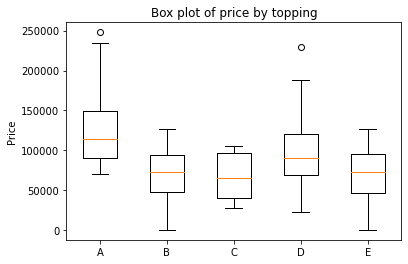

In [44]:
import csv
import matplotlib.pyplot as plt

# Read the CSV file
with open('pizza_v1.csv', 'r') as file:
    data = csv.reader(file)
    next(data)  # skip header row
    data = list(data)

# Separate data into categories
categories = {}
for row in data:
    if row[0] not in categories:
        categories[row[0]] = []
    categories[row[0]].append(float(row[1]))

# Draw the box plot
fig, ax = plt.subplots()
ax.boxplot(categories.values(), labels=categories.keys())
ax.set_ylabel('Price')
ax.set_title('Box plot of price by topping')
plt.show()